# Desafio Data Science

Serão feitos analises e exploração de dados para responder questões

In [1]:
# import packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
# read data
df = pd.read_csv('../data/bank-full.csv', sep= ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# describe data
des = df.describe()
des.head()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000


In [4]:
# check if any column has null values
cols = df.columns
for col in cols:
    print(col + ' ' + 'has values: ', df[cols].isnull().any())

age has values:  age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool
job has values:  age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool
marital has values:  age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous 

## 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [5]:
# Qual % de clientes possui apenas um tipo de emprestimo e qual % de ambos e qual nao tem emprestimo nenhum

both = 0
housing = 0
loan = 0
noloan = 0

for i in range(0, len(df)):
    if (df.iloc[i].housing == 'yes'):
        if (df.iloc[i].loan == 'yes'):
            both = both + 1
        else:
            housing = housing + 1
    elif (df.iloc[i].loan == 'no'):
        noloan = noloan + 1
    else:
        loan = loan + 1

bothp = round(both / len(df) * 100, 1)
housingp = round(housing / len(df) * 100, 1)
loanp = round(loan / len(df) * 100, 1)
noloanp = round(noloan / len(df) * 100, 1)

print('both: ' + str(bothp) + '%')
print('housing: ' + str(housingp) + '%')
print('loan: ' + str(loanp) + '%')
print('noloan: ' + str(noloanp) + '%')

both: 9.7%
housing: 45.9%
loan: 6.4%
noloan: 38.1%


In [6]:
# Add uma coluna adicional com o tipo de empréstimo de cada cliente
df1 = []

for i in range(0, len(df)):
    if (df.iloc[i].housing == 'yes'):
        if (df.iloc[i].loan == 'yes'):
            df1.append(3)
        else:
            df1.append(1)
    elif (df.iloc[i].loan == 'no'):
        df1.append(0)
    else:
        df1.append(2)


df1 = pd.DataFrame(df1)
df = pd.concat([df, df1], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,0
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


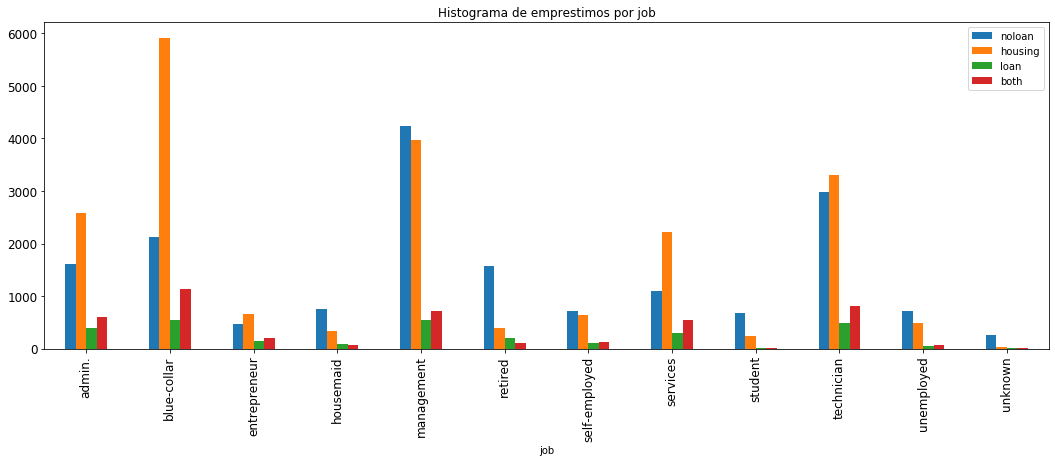

In [7]:
# Histrograma de profissoes por tipo de emprestimo
prof = df[0].groupby([df['job'], df[0]]).count()
df_jl = pd.DataFrame(prof.unstack())
df_jl.columns = ['noloan', 'housing', 'loan', 'both']
df_jl.plot(kind='bar', title ="Histograma de emprestimos por job", figsize=(18, 6), legend=True, fontsize=12)
plt.show()

### Resposta Questao 1:

Confirendo no histograma, podemos notar que tem mais tendência a fazer um empréstimo é a **blue-collar** e o tipo de empréstimo é o **housing**

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

Nr. de contatos: 1 Porcentagem: 48 %
Nr. de contatos: 2 Porcentagem: 26 %
Nr. de contatos: 3 Porcentagem: 11 %
Nr. de contatos: 4 Porcentagem: 5 %
Nr. de contatos: 5 Porcentagem: 2 %
Nr. de contatos: 6 Porcentagem: 1 %
Nr. de contatos: 7 Porcentagem: 0 %
Nr. de contatos: 8 Porcentagem: 0 %
Nr. de contatos: 9 Porcentagem: 0 %
Nr. de contatos: 10 Porcentagem: 0 %
Nr. de contatos: 11 Porcentagem: 0 %
Nr. de contatos: 12 Porcentagem: 0 %
Nr. de contatos: 13 Porcentagem: 0 %
Nr. de contatos: 14 Porcentagem: 0 %
Nr. de contatos: 15 Porcentagem: 0 %
Nr. de contatos: 16 Porcentagem: 0 %
Nr. de contatos: 17 Porcentagem: 0 %
Nr. de contatos: 18 Porcentagem: 0 %
Nr. de contatos: 19 Porcentagem: 0 %
Nr. de contatos: 20 Porcentagem: 0 %
Nr. de contatos: 21 Porcentagem: 0 %
Nr. de contatos: 22 Porcentagem: 0 %


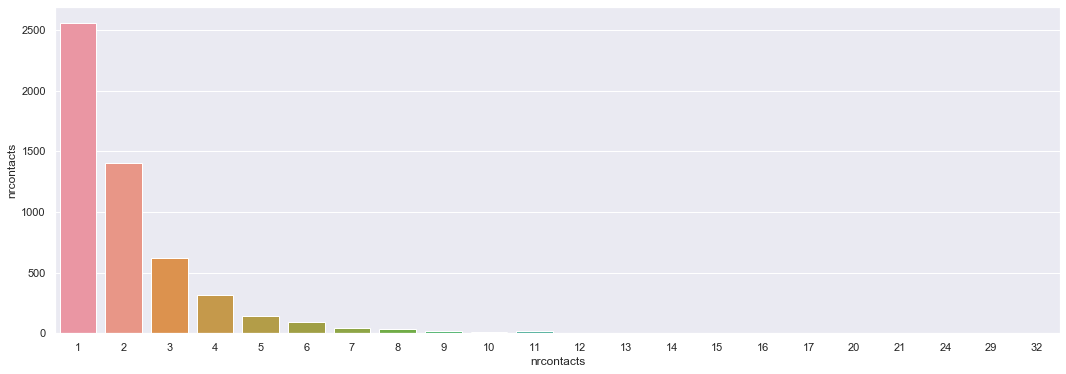

In [8]:
# Dataset e os gráficos de barra para encontrar as relações.
df_camp = []
df_cont = []

for i in range(0, len(df)):
    if (df.iloc[i].y == 'yes'):
        df_camp.append(df.iloc[i].campaign)
        df_cont.append(df.iloc[i].contact)
    
df_camp = pd.DataFrame(df_camp)
df_cont = pd.DataFrame(df_cont)
df_camp = pd.concat([df_camp, df_cont], axis=1)

df_camp.columns=['nrcontacts', 'typecontacts']
cont = df_camp['nrcontacts'].groupby([df_camp['nrcontacts']]).count()


min(df_camp['nrcontacts'])
max(df_camp['nrcontacts'])

cont = pd.DataFrame(cont)

# Plot bar
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x=cont.index, y=cont.nrcontacts)

for i in range(0, len(cont)):
    nrcont = i + 1
    perc = cont.iloc[i]/len(df_camp) * 100
    perc = int(perc)
    print('Nr. de contatos: ' + str(nrcont) + ' Porcentagem: ' + str(perc) + ' %')
    perc = 0

### Resposta Questão 2:
Observando o gráfico de barras, podemos notar que o maior sucesso da campanha está
**no primeiro e no segundo contato**. O terceiro contato ainda tem relevância com 11% aproximadamente, mas
a partir do quarto contato, o percentual de sucessos por número de contatos passa a não ter relevância. Ou seja, um grande numero de contatos nao aumenta a chance de sucesso.

## 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
Para fazer uma análise das ligações, vamos verificar os modos de contato com o cliente que foram utilizados.
Vamos reduzir o dataset e utilizar os dados de um número máximo de seis contatos pois atingem no total,
93% do total de sucessos na campanha.

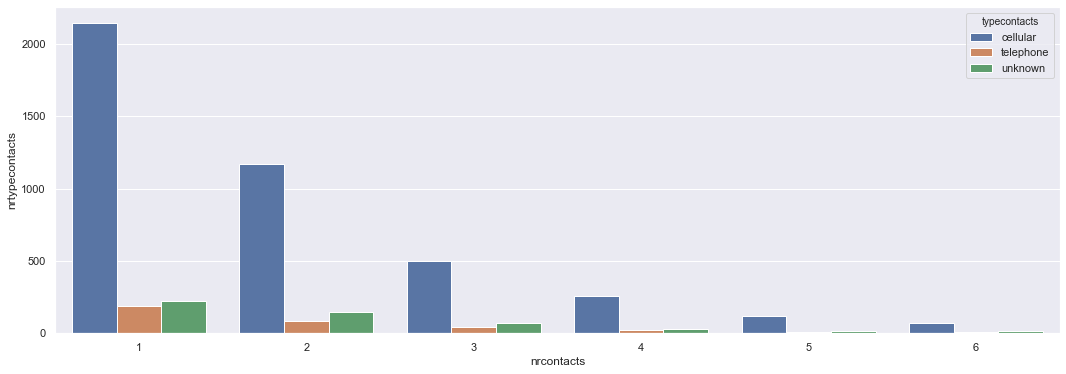

In [9]:
df_camp_sub = []
for j in range(0, len(df_camp)):
    if (df_camp.iloc[j].nrcontacts <= 6):
        df_camp_sub.append(df_camp.iloc[j])

df_camp_sub = pd.DataFrame(df_camp_sub)
camp_sub = df_camp_sub['typecontacts'].groupby([df_camp_sub['nrcontacts'], df_camp_sub['typecontacts']]).count()

camp_sub = pd.DataFrame(camp_sub)
camp_sub.columns = ['nrtypecontacts']
camp_sub.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(18,6)})
ax = sns.barplot(x = 'nrcontacts', y = 'nrtypecontacts', hue = 'typecontacts', data=camp_sub)

### Resposta Questão 3:
Verificamos que o principal modo é através de ligações telefônicas,
sejam através de celular ou linha fixa. Com isto, eu posso indicar que o número médio de
**3 ligações pois atingiríamos 85% de sucesso e o número máximo de 6 ligações onde atingiríamos 93% de sucesso.**

## 4. O resultado da campanha anterior tem relevância na campanha atual?


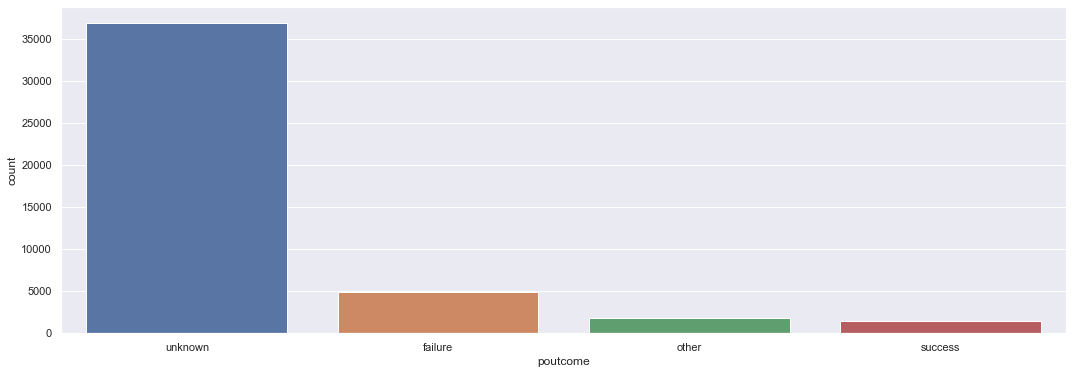

In [10]:
# Bar plot about outcome
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x=df['poutcome'], data=df)

Vamos definir duas hipotesis:
    
- Hipótese 0 : A diferença entre as taxas é zero
- Hipótese 1 : A diferença entre as taxas NÃO é zero

Como se trata de uma distribuição bimodal será utilizado o t_test

In [11]:
grouped4 = df.pivot_table(values='age', index='poutcome', columns='y', aggfunc='count')
grouped4.head()

y,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


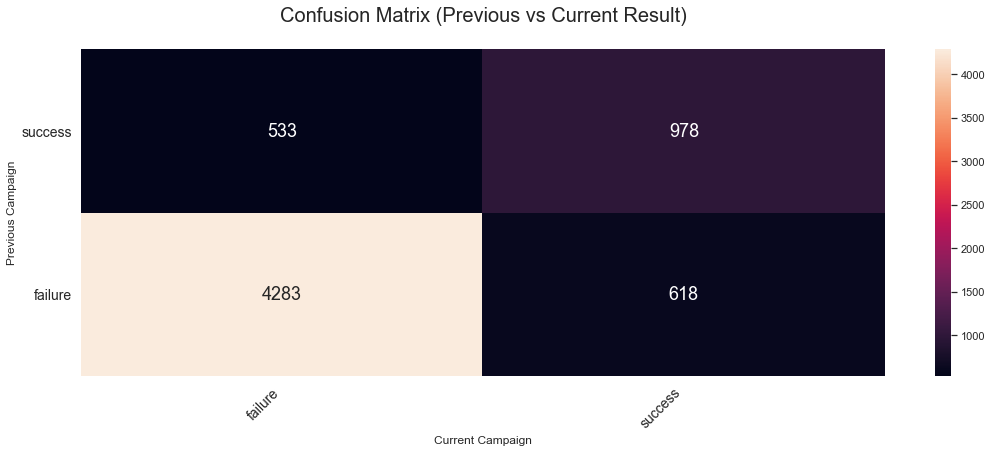

In [12]:
data = df.copy()
filtering = (data['poutcome']=='failure') | (data['poutcome']=='success')

# Pega amostras com 'poutcome' válidos
ex2 = data[['poutcome','y']][filtering]

# Transforma 'y' e 'poutcome' em valores numéricos (label encoding) 
bool_y, label_y = pd.factorize(ex2['y'])        
bool_p, label_p = pd.factorize(ex2['poutcome']) 

# Plot confusion matrix
df_cm = pd.DataFrame(cm(bool_p, bool_y), index=label_p, columns=label_p)
plt.figure(figsize = (18,6))
plot = sns.heatmap(df_cm, annot=True, annot_kws={"size": 18}, fmt="d")
plot.yaxis.set_ticklabels(plot.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plot.set_ylim([0,2])
plot.xaxis.set_ticklabels(plot.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
sns.set(font_scale=1)
plt.ylabel('Previous Campaign')
plt.xlabel('Current Campaign')
plt.title("Confusion Matrix (Previous vs Current Result)\n", size=20)
plt.show()

### Resposta Questao 4:
Observando a matriz de confusão, podemos notar que há uma grande tendência de que indivíduos que recusaram a campanha anterior também recusarão a atual. Nota-se, também, que boa parcela dos sucessos na campanha anterior se mantém na campanha atual.

A partir da análise, podemos assumir que o resultado da campanha anterior é relevante para atual.